<a href="https://colab.research.google.com/github/ThuanPhong0126/Deeplearning/blob/master/TrafficSign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf

In [0]:
tf.__version__

'2.2.0-rc3'

In [0]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
pwd

'/content'

In [0]:
cd /content/drive/My Drive/Colab Notebooks/TrafficSign

/content/drive/My Drive/Colab Notebooks/TrafficSign


In [0]:
pwd

'/content/drive/My Drive/Colab Notebooks/TrafficSign'

In [0]:
ls

Untitled0.ipynb


In [0]:
link="https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5898cd6f_traffic-signs-data/traffic-signs-data.zip"

In [0]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=cfad21c2f8d38c398157e73ea0e0d008257c69c9979816ff88edc9f29c5b1a81
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [0]:
import wget
wget.download(link)

'traffic-signs-data.zip'

In [0]:
!unzip -q traffic-signs-data.zip

In [0]:
ls

test.p  traffic-signs-data.zip  train.p  Untitled0.ipynb  valid.p


In [0]:
train_link='./'+'train.p'
test_link='./'+'test.p'
valid_link='./'+'valid.p'

In [0]:
import pickle

In [0]:
with open(train_link,mode='rb') as f:
  train=pickle.load(f)

In [0]:
with open(valid_link,mode='rb') as f:
  valid=pickle.load(f)

In [0]:
with open(test_link,mode='rb') as f:
  test=pickle.load(f)

In [0]:
train

In [0]:
trainX=train['features']
trainY=train['labels']
trainX.shape

(34799, 32, 32, 3)

In [0]:
trainX[0].shape

(32, 32, 3)

In [0]:
import matplotlib.pyplot as plt

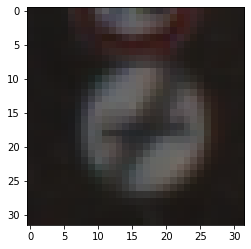

In [0]:
plt.imshow(trainX[0])

In [0]:
classNames = {0: 'Speed limit (20km/h)',
 1: 'Speed limit (30km/h)',
 2: 'Speed limit (50km/h)',
 3: 'Speed limit (60km/h)',
 4: 'Speed limit (70km/h)',
 5: 'Speed limit (80km/h)',
 6: 'End of speed limit (80km/h)',
 7: 'Speed limit (100km/h)',
 8: 'Speed limit (120km/h)',
 9: 'No passing',
 10: 'No passing for vehicles over 3.5 metric tons',
 11: 'Right-of-way at the next intersection',
 12: 'Priority road',
 13: 'Yield',
 14: 'Stop',
 15: 'No vehicles',
 16: 'Vehicles over 3.5 metric tons prohibited',
 17: 'No entry',
 18: 'General caution',
 19: 'Dangerous curve to the left',
 20: 'Dangerous curve to the right',
 21: 'Double curve',
 22: 'Bumpy road',
 23: 'Slippery road',
 24: 'Road narrows on the right',
 25: 'Road work',
 26: 'Traffic signals',
 27: 'Pedestrians',
 28: 'Children crossing',
 29: 'Bicycles crossing',
 30: 'Beware of ice/snow',
 31: 'Wild animals crossing',
 32: 'End of all speed and passing limits',
 33: 'Turn right ahead',
 34: 'Turn left ahead',
 35: 'Ahead only',
 36: 'Go straight or right',
 37: 'Go straight or left',
 38: 'Keep right',
 39: 'Keep left',
 40: 'Roundabout mandatory',
 41: 'End of no passing',
 42: 'End of no passing by vehicles over 3.5 metric tons'}

In [0]:
classNames[trainY[50]]

'End of no passing'

In [0]:
from sklearn.utils import shuffle

In [0]:
trainX,trainY=shuffle(trainX,trainY)

In [0]:
validX=valid['features']
validY=valid['labels']
testX=test['features']
testY=test['labels']

In [0]:
trainX=trainX.astype('float')/255.0
validX=validX.astype('float')/255.0
testX=testX.astype('float')/255.0

In [0]:
from sklearn.preprocessing import LabelBinarizer

In [0]:
lb=LabelBinarizer()

In [0]:
trainY=lb.fit_transform(trainY)

In [0]:
validY=lb.fit_transform(validY)

In [0]:
testY=lb.fit_transform(testY)

In [0]:
testY[1]

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [0]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import concatenate
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD

In [0]:
model=Sequential()

In [0]:
width=32
height=32
classes=43

In [0]:
shape=(width,height,3)

In [0]:
model.add(Conv2D(32,(3,3),padding="same",input_shape=shape))

In [0]:
model.add(Activation("relu"))

In [0]:
model.add(BatchNormalization())

In [0]:
model.add(Conv2D(32,(3,3),padding="same"))

In [0]:
model.add(Activation("relu"))

In [0]:
model.add(BatchNormalization())

In [0]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [0]:
model.add(Conv2D(64,(3,3),padding="same"))

In [0]:
model.add(Activation("relu"))

In [0]:
model.add(BatchNormalization())

In [0]:
model.add(Conv2D(64,(3,3),padding="same"))

In [0]:
model.add(Activation("relu"))

In [0]:
model.add(BatchNormalization())

In [0]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [0]:
model.add(Flatten())

In [0]:
model.add(Dense(512))

In [0]:
model.add(Activation("relu"))

In [0]:
model.add(BatchNormalization())

In [0]:
model.add(Dense(classes))

In [0]:
model.add(Activation("softmax"))

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0

In [0]:
aug=ImageDataGenerator(rotation_range=0.18,zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,horizontal_flip=True)

In [0]:
learning_rate=0.01

In [0]:
epochs=10
batch_size=64

In [0]:
opt=SGD(learning_rate=learning_rate,momentum=0.9)

In [0]:
model.compile(optimizer=opt,loss="categorical_crossentropy",metrics=["accuracy"])

In [0]:
H=model.fit_generator(aug.flow(trainX,trainY,batch_size=batch_size),validation_data=(validX,validY),steps_per_epoch=trainX.shape[0]//batch_size,epochs=epochs,verbose=1)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
543/543 [==============================] - 236s 435ms/step - loss: 2.1208 - accuracy: 0.3902 - val_loss: 2.3530 - val_accuracy: 0.3583
Epoch 2/10
543/543 [==============================] - 234s 430ms/step - loss: 0.8833 - accuracy: 0.7060 - val_loss: 1.1963 - val_accuracy: 0.6417
Epoch 3/10
543/543 [==============================] - 237s 437ms/step - loss: 0.4174 - accuracy: 0.8601 - val_loss: 1.1095 - val_accuracy: 0.6905
Epoch 4/10
543/543 [==============================] - 235s 432ms/step - loss: 0.2324 - accuracy: 0.9241 - val_loss: 0.7020 - val_accuracy: 0.8100
Epoch 5/10
543/543 [==============================] - 236s 435ms/step - loss: 0.1582 - accuracy: 0.9497 - val_loss: 0.8178 - val_accuracy: 0.7796
Epoch 6/10
543/543 [==============================] - 236s 435ms/step - loss: 0.1181 - accuracy: 0.9611 - val_loss: 0.6771 - val_accuracy: 0.8347
Epoch 7/10
543/543 [============================

In [0]:
model.save('phong.h5')

In [0]:
saved_model=tf.keras.models.load_model("phong.h5")

In [0]:
results =saved_model.predict(testX[100:101])

In [0]:
import numpy as np

In [0]:
final=np.argmax(results)

In [0]:
final=classNames[final]

In [0]:
final

'Speed limit (30km/h)'

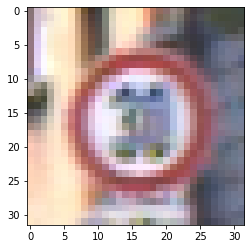

In [0]:
plt.imshow(test["features"][100])